In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

[[ 0.03159499  0.98698776]
 [ 2.11509784 -0.04624397]
 [ 0.88248972 -0.07575606]
 [-0.0551441  -0.03733246]
 [ 0.82954503 -0.53932149]
 [ 2.11285708  0.66208353]
 [ 0.5696927   0.33744136]
 [ 0.95217454 -0.75307471]
 [-0.02922115  0.39287336]
 [ 1.71579557  0.36069454]
 [-0.27883014  0.61420539]
 [ 2.00344509 -0.3091496 ]
 [ 1.50009616 -0.74636376]
 [ 1.22540835  1.19793017]
 [ 0.46730819  0.54703192]
 [-0.36653222  1.11971633]
 [ 0.30124459  1.23315697]
 [ 0.30430746  0.82373935]
 [-0.23712492  0.77876034]
 [ 1.16339832  0.55290238]
 [-0.59702417  0.6572361 ]
 [ 0.46356735 -0.1951543 ]
 [ 0.68451111  0.75287685]
 [ 0.70515699 -0.45892444]
 [-0.65805008 -0.12944211]
 [-0.74662946 -0.3829632 ]
 [ 0.60585226  0.31252842]
 [ 2.18137168 -0.02291747]
 [ 1.91980633  0.17247329]
 [ 1.4834364  -0.10517023]
 [ 0.47404723 -0.14575067]
 [ 1.05614605 -1.03570207]
 [ 1.86500732 -0.01107874]
 [ 0.4194721  -0.32478101]
 [ 0.06873258  0.56648467]
 [-0.17332432  1.00215131]
 [ 0.12412421  1.00062892]
 

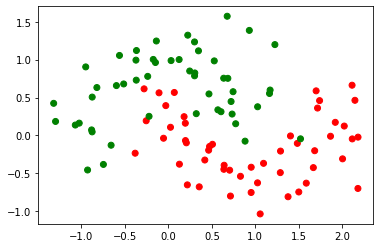

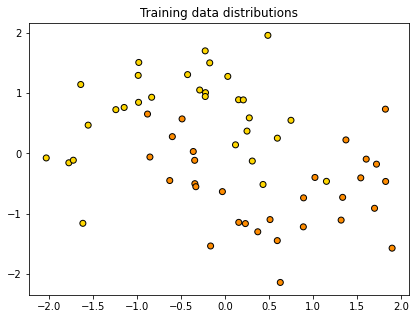

[[-0.22120141  1.00868763]
 [ 0.27524467  0.58976897]
 [ 0.74779523  0.54957438]
 [-1.2378428   0.7264372 ]
 [ 0.11892081  0.14210094]
 [ 0.03138162  1.27867747]
 [-1.14359579  0.76280671]
 [ 1.69531142 -0.91174565]
 [-1.55182484  0.46910804]
 [ 0.15581821 -1.14573741]
 [-0.28724359  1.0525906 ]
 [ 1.81872078  0.7346544 ]
 [ 0.43094924 -0.51610516]
 [ 0.24942261  0.37041953]
 [-0.85151619 -0.06022663]
 [-0.17344159  1.50362044]
 [-1.77093289 -0.15602456]
 [ 1.15004209 -0.46423271]
 [-0.36004546  0.03132026]
 [-0.02974639 -0.63475756]
 [-0.48691402  0.57259859]
 [-1.63601617  1.14409337]
 [ 0.51038341 -1.09925804]
 [-0.83190068  0.93244079]
 [ 0.30920485 -0.127041  ]
 [ 0.88796385 -1.22007405]
 [-0.1636123  -1.53782127]
 [ 0.15350841  0.8912278 ]
 [-0.87894137  0.65349306]
 [ 1.53916295 -0.40646646]
 [ 1.37086214  0.22375044]
 [-0.42443599  1.30854456]
 [-0.22413227  0.94477311]
 [-0.22465612  1.70271788]
 [ 1.7173351  -0.17875463]
 [-0.98048598  0.8478617 ]
 [-1.72018154 -0.11323539]
 

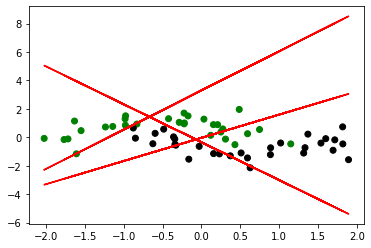

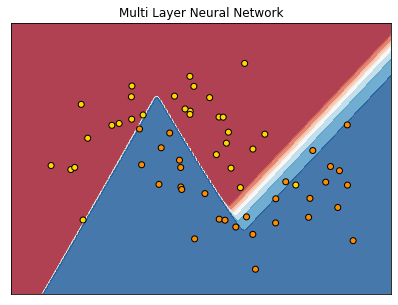

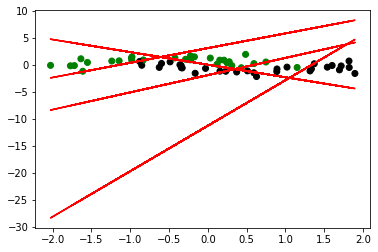

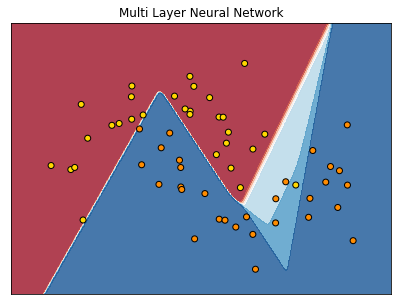

Text(0.5, 1.0, 'Multi Layer Neural Network')

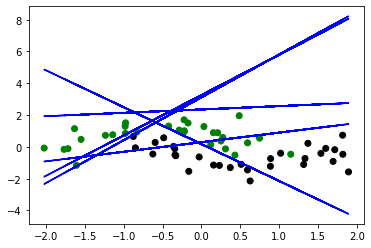

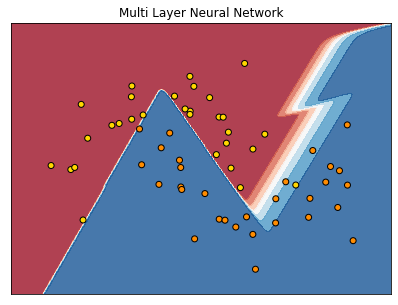

In [2]:
from sklearn.datasets import make_moons, make_classification 
moon =make_moons(noise=0.3, random_state=0) 
features,labels=moon
print(features)
print(labels)
colors=["green","red"] 
plt.scatter(features[:,0],features[:,1],color=[colors[idx] for idx in labels])
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
h=.02 
X, y=features,labels
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=25)
print (X_train)
print (y_train)
print (X_test)
print (y_test)
from matplotlib.colors import ListedColormap 
plt.subplots(figsize = (15,5))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['gold','darkorange']) ###FF0000', #0000FF']) 
ax = plt.subplot(1, 2, 1)
ax.set_title("Training data distributions")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
plt.show()
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=3,random_state=12,activation='logistic',max_iter=500) 
clf.fit(X_train, y_train)
print (X_train)
print (y_train)
print(clf.coefs_)
print(clf.intercepts_)
def findSlopeIntercept(coefs,bias): 
    hidden_wts=coefs[0] 
    bias_wts=bias[0] 
    num=len(hidden_wts[0]) 
    slopIntercept=[]
    for i in range(num): 
        w=[bias_wts[i],hidden_wts[0,i],hidden_wts[1,i]] 
        slope=w[1]/w[2]*(-1)
        intercept=w[0]/w[2]*(-1) 
        slopIntercept.append([slope,intercept])
    return(slopIntercept)
slopeIntercept = findSlopeIntercept(clf.coefs_,clf.intercepts_)
print(slopeIntercept)
colors=["green","black"]
xvalues=X_train[:,0] 
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train]) 
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1] 
    plt.plot(xvalues,yvalues,"r")
    
     # Plot the decision boundary. For that, we will assign a color to each # point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.subplots(figsize = (15,5))

ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
ax.set_xlim(xx.min(), xx.max()) 
ax.set_ylim(yy.min(), yy.max()) 
ax.set_xticks(()) 
ax.set_yticks(())
ax.set_title('Multi Layer Neural Network')
plt.show()
 # now increase to 4 hidden nodes
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=4,random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train) 
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_)
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1] 
    plt.plot(xvalues,yvalues,"r")
     # Plot the decision boundary. For that, we will assign a color to each # point in the mesh [x_min, x_max]x[y_min, y_max]. plt.subplots(figsize = (15,5))
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)

if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
ax.set_xlim(xx.min(), xx.max()) 
ax.set_ylim(yy.min(), yy.max()) 
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Multi Layer Neural Network')
plt.show()
 # now increase to 5 hidden nodes. As we add more hidden nodes, the model is becoming more complex
# and therefore, have a higher risk of overfitting
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=5,random_state=12,activation='logistic',max_iter=500)
clf.fit(X_train, y_train) 
slopeIntercept=findSlopeIntercept(clf.coefs_,clf.intercepts_) 
plt.scatter(X_train[:,0],X_train[:,1],color=[colors[idx] for idx in y_train])
num=len(slopeIntercept)
for i in range(num):
    yvalues=xvalues*slopeIntercept[i][0]+slopeIntercept[i][1] 
    plt.plot(xvalues,yvalues,"b")
     # Plot the decision boundary. For that, we will assign a color to each # point in the mesh [x_min, x_max]x[y_min, y_max]. 
plt.subplots(figsize = (15,5))
ax = plt.subplot(1, 2, 2)
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Multi Layer Neural Network')
